In [1]:
!pip list

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
abstract-rendering (0.5.1)
alabaster (0.7.7)
anaconda-client (1.4.0)
anaconda-navigator (1.1.0)
appdirs (1.4.3)
appnope (0.1.0)
argcomplete (1.0.0)
astropy (2.0.2)
Babel (2.2.0)
backports-abc (0.4)
backports.ssl-match-hostname (3.5.0.1)
backports.weakref (1.0rc1)
beautifulsoup4 (4.4.1)
biopython (1.70)
bitarray (0.8.1)
blaze (0.9.1)
bleach (1.5.0)
bokeh (0.12.1)
boto (2.39.0)
Bottleneck (1.2.1)
cached-property (1.3.1)
cdecimal (2.3)
certifi (2015.11.20.1)
cffi (1.5.2)
chest (0.2.3)
click (6.7)
cloudpickle (0.1.1)
clyent (1.2.1)
colorama (0.3.7)
conda (4.4.4)
conda-build (1.19.0)
conda-manager (0.3.1)
configobj (5.0.6)
cryptography (1.7.1)
cycler (0.10.0)
Cython (0.23.4)
cytoolz (0.7.5)
dask (0.16.0)
datashape (0.5.1)
decorator (4.0.6)
defusedxml (0.5.0)
dill (0.2.4)
docutils (

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline

In [2]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

from imblearn.under_sampling import CondensedNearestNeighbour


X, y = make_classification(n_classes=2, weights=[0.1, 0.9],
                           n_features=20, n_samples=5000)

sm = SMOTE(ratio='auto', kind='regular')
X_resampled, y_resamped = sm.fit_sample(X,y)


In [3]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply Condensed Nearest Neighbours
cnn = CondensedNearestNeighbour(return_indices=True)
X_resampled, y_resampled, idx_resampled = cnn.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)


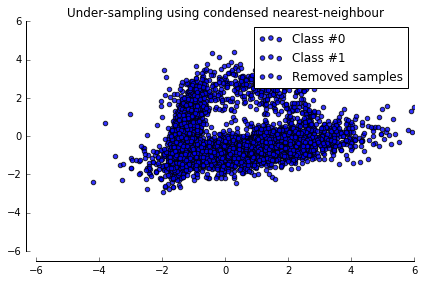

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

idx_samples_removed = np.setdiff1d(np.arange(X_vis.shape[0]),
                                   idx_resampled)

idx_class_0 = y_resampled == 0
plt.scatter(X_res_vis[idx_class_0, 0], X_res_vis[idx_class_0, 1],
            alpha=.8, label='Class #0')
plt.scatter(X_res_vis[~idx_class_0, 0], X_res_vis[~idx_class_0, 1],
            alpha=.8, label='Class #1')
plt.scatter(X_vis[idx_samples_removed, 0], X_vis[idx_samples_removed, 1],
            alpha=.8, label='Removed samples')

# make nice plotting
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])

plt.title('Under-sampling using condensed nearest-neighbour')
plt.legend()
plt.tight_layout()
plt.show()


=====
SMOTE
=====

An illustration of the SMOTE method and its variant.




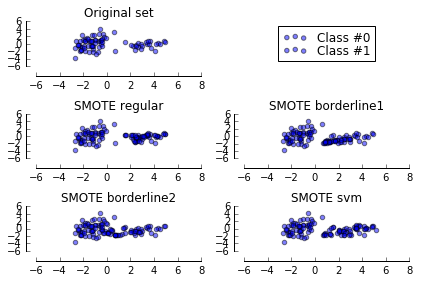

In [10]:
"""
=====
SMOTE
=====

An illustration of the SMOTE method and its variant.

"""

# Authors: Fernando Nogueira
#          Christos Aridas
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE

print(__doc__)


def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

    return c0, c1


# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.3, 0.7],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=80, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply regular SMOTE
kind = ['regular', 'borderline1', 'borderline2', 'svm']
sm = [SMOTE(kind=k) for k in kind]
X_resampled = []
y_resampled = []
X_res_vis = []
for method in sm:
    X_res, y_res = method.fit_sample(X, y)
    X_resampled.append(X_res)
    y_resampled.append(y_res)
    X_res_vis.append(pca.transform(X_res))

# Two subplots, unpack the axes array immediately
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
# Remove axis for second plot
ax2.axis('off')
ax_res = [ax3, ax4, ax5, ax6]

c0, c1 = plot_resampling(ax1, X_vis, y, 'Original set')
for i in range(len(kind)):
    plot_resampling(ax_res[i], X_res_vis[i], y_resampled[i],
                    'SMOTE {}'.format(kind[i]))

ax2.legend((c0, c1), ('Class #0', 'Class #1'), loc='center',
           ncol=1, labelspacing=0.)
plt.tight_layout()
plt.show()